In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
houses = pd.read_csv('Casas_venezuela.csv')
apartments = pd.read_csv('Departamentos_venezuela.csv')

In [3]:
def graph_categorical_relations(df, features):
    for col in features:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()

        grouped = df.groupby(col)
        df2 = pd.DataFrame({col:vals['Precio'] for col,vals in grouped})
        medians = df2.median()
        medians.sort_values(ascending=True, inplace=True)
        df2 = df2[medians.index]

        df2.boxplot(ax=ax)
        ax.set_ylabel('Precio')
        ax.get_yaxis().set_major_formatter(lambda x, pos: f'{x:.0f}')

        if len(ax.get_xticklabels()) > 10 and any([len(str(label.get_text())) >= 5 for label in ax.get_xticklabels()]):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        elif len(ax.get_xticklabels()) > 5 and any([len(str(label.get_text())) >= 5 for label in ax.get_xticklabels()]):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

        ax.set_title('Precio en función de ' + col)
    plt.show()

In [4]:
from scipy.stats import linregress

In [11]:
def graph_numeric_relations(df, features):
    for col in features:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()

        feature = df[col]

        try:
            feature = df[col].astype(int)
            label = df['Precio']
        except pd.errors.IntCastingNaNError:
            feature = df[ df[col].notnull() ][col]
            label = df[ df[col].notnull() ]['Precio']

        corr = feature.corr(label)

        plt.scatter(x=feature, y=label)

        lin_reg = linregress(x=feature, y=label)
        line = [ lin_reg.slope * xi + lin_reg.intercept for xi in feature ]
        ax.plot(feature, line, color='red')

        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, f'Correlación: {corr}\n'+r'$R^{2}$'+f': {lin_reg.rvalue**2:.4f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

        ax.set_xlabel(col)
        ax.set_ylabel('Precio')
        ax.ticklabel_format(style='plain')
        ax.set_title(f'Precio en función de {col}')
    plt.show()

# Casas

In [6]:
mask_price = ((houses['Precio'] <= houses['Precio'].quantile(q=0.95)) & (houses['Precio'] >= houses['Precio'].quantile(q=0.05)))
mask_area = ((houses['Área Privada'] <= houses['Área Privada'].quantile(q=0.95)) & (houses['Área Privada'] >= houses['Área Privada'].quantile(q=0.05)))
mask_terrain = ((houses['Terreno'] <= houses['Terreno'].quantile(q=0.95)) & (houses['Terreno'] >= houses['Terreno'].quantile(q=0.05)))

houses = houses[mask_area & mask_price & mask_terrain]

In [7]:
houses.shape

(276, 20)

In [8]:
houses.head()

,Precio,Codígo RAH,Tipo de Propiedad,Estilo,Área Privada,Terreno,Estado Del Inmueble,Dormitorios,Total Baños,Baños Completos,Tipo De Estacionamiento,Puestos De Estacionamiento,Amoblado,Dormitorio De Servicio,Calle,País,Estado,Ciudad,Urbanización,Medios Baños
0,498000,VE 23-26224,Casa,1 Nivel,948,948,Usado,5,8,8,Cubierto,10.0,Si,Si,Publica,Venezuela,Distrito Metropolitano,Caracas,Lomas del Club Hipico,0.0
1,240000,VE 23-26220,Casa,Multipes Niveles,307,704,Usado,5,6,5,Descubierto,4.0,No,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,El Marques,1.0
2,580000,VE 23-26215,Casa,1 Nivel,380,1251,Usado,5,6,5,Cubierto,5.0,No,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,Prados del Este,1.0
3,380000,VE 23-26209,Casa,Duplex,580,504,Usado,4,5,4,Cubierto,3.0,No,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,Sorocaima,1.0
4,270000,VE 23-26196,Casa,Multipes Niveles,400,617,Usado,4,3,3,Cubierto,5.0,No,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,Lomas del Halcon,0.0


In [9]:
house_numeric_features = ['Área Privada', 'Terreno']
houses_ordinal_features = ['Dormitorios', 'Total Baños', 'Puestos De Estacionamiento']
houses_categorical_features = ['Estilo', 'Estado Del Inmueble', 'Tipo De Estacionamiento', 'Calle', 'Estado', 'Ciudad']

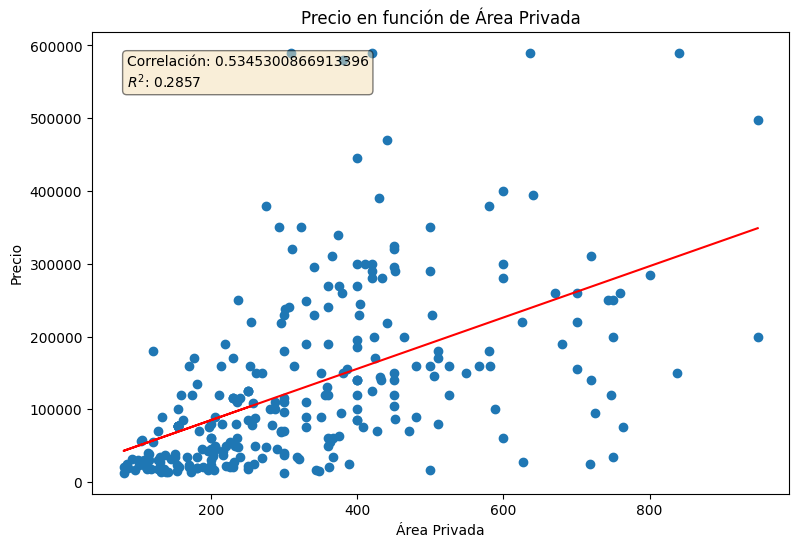

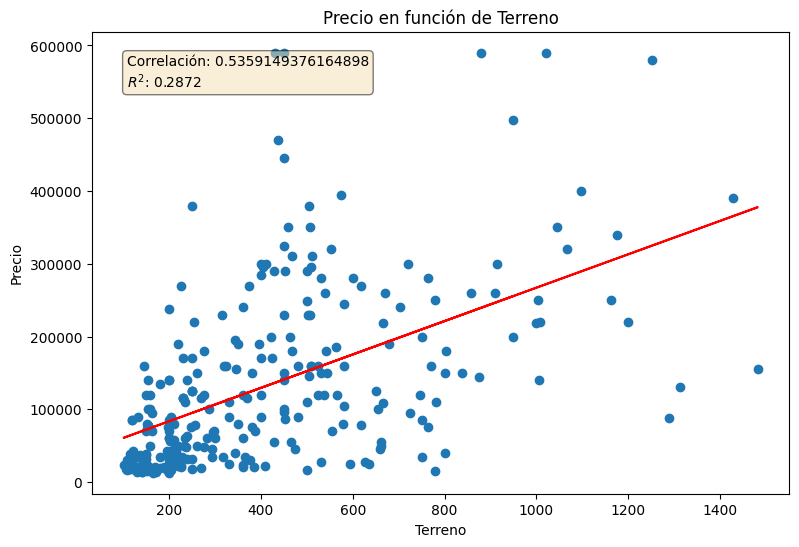

In [12]:
graph_numeric_relations(houses, house_numeric_features)

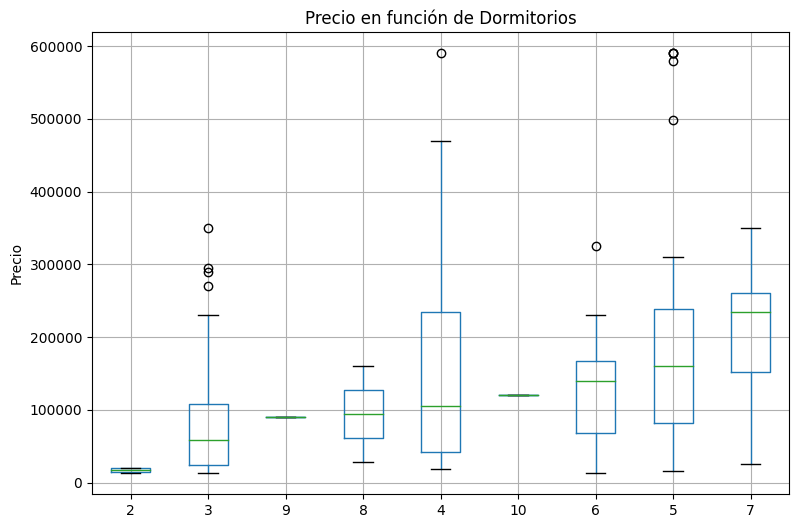

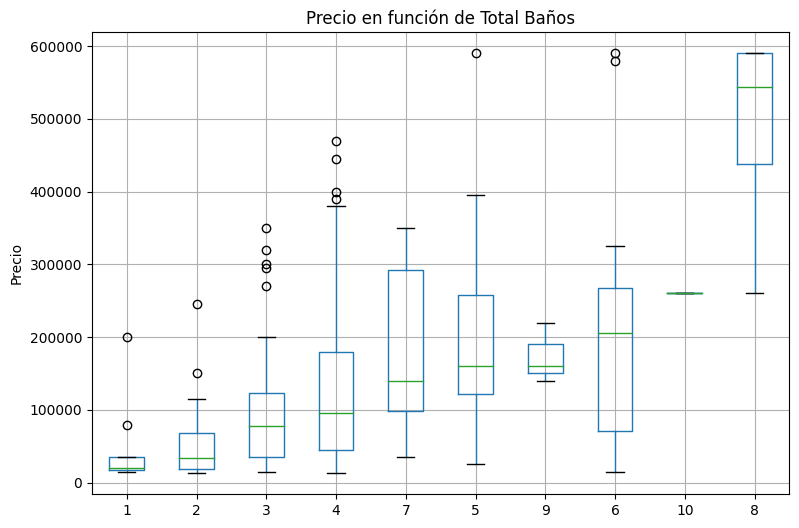

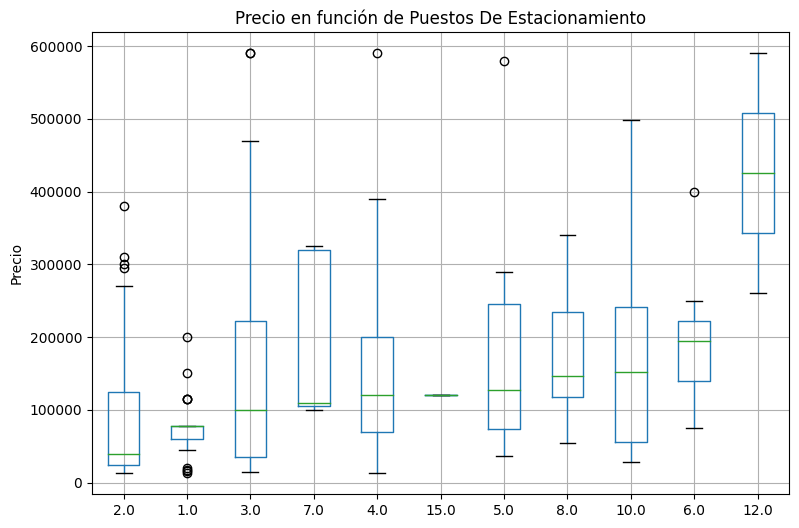

In [13]:
graph_categorical_relations(houses, houses_ordinal_features)

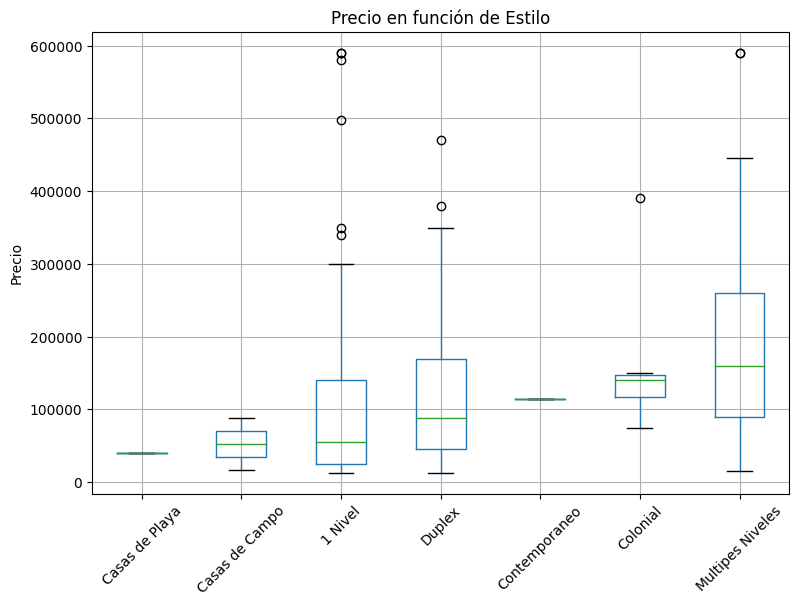

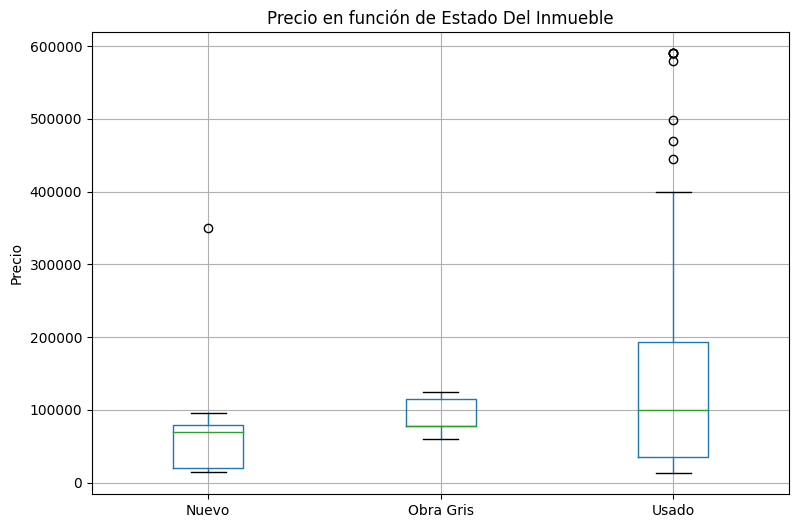

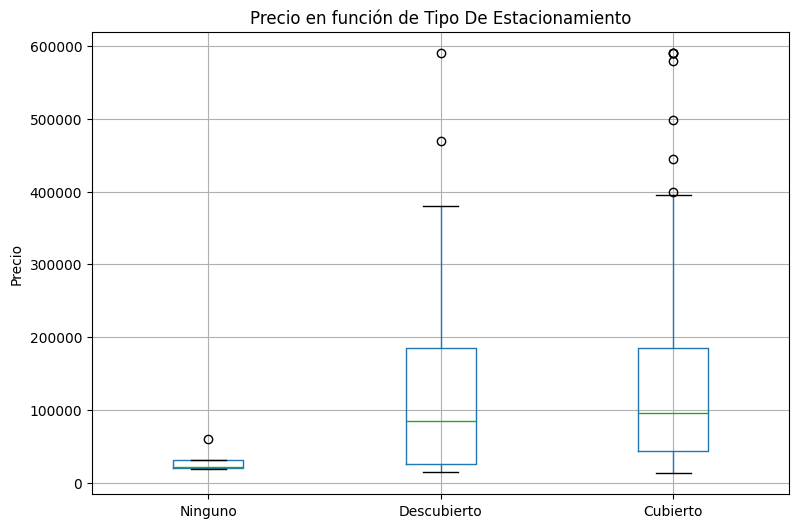

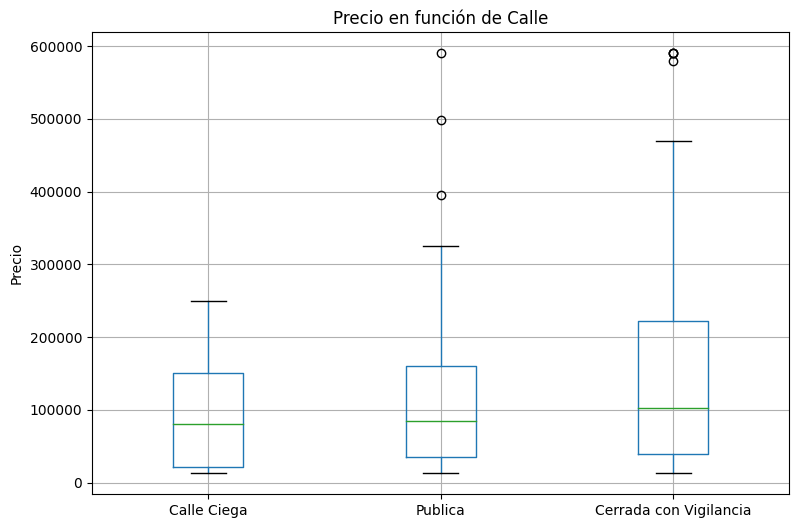

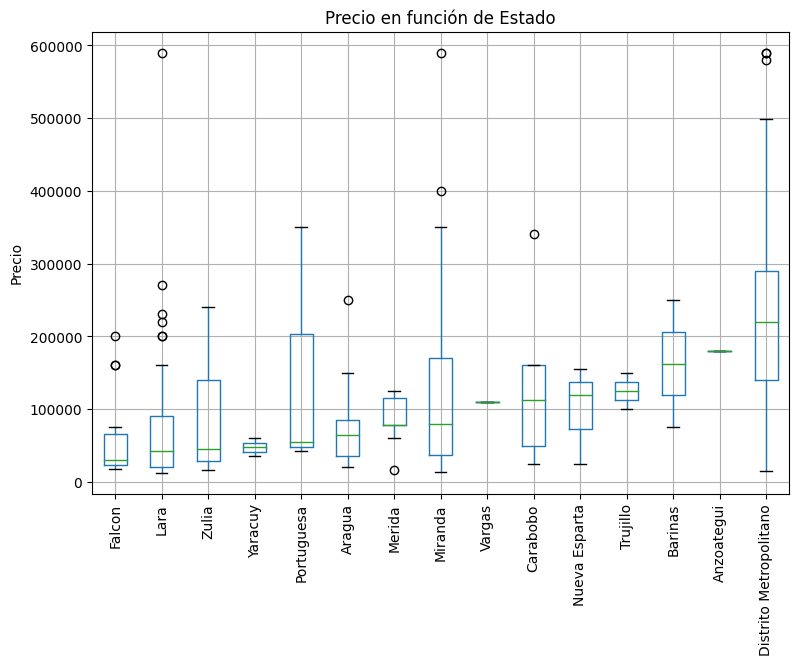

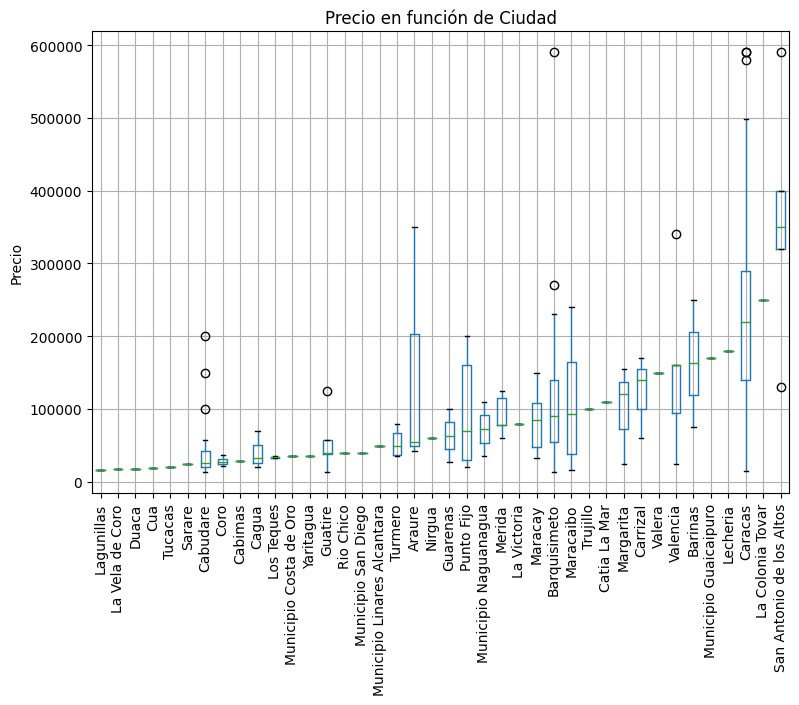

In [14]:
graph_categorical_relations(houses, houses_categorical_features)

Para las casas, el estado del inmueble y calle no parecen tener mucho efecto en el precio de la misma, por lo tanto no van a ser consideradas features para el entrenamiento de los modelos. **CAMBIAR**

In [15]:
houses_categorical_features = [cat for cat in houses_categorical_features if cat not in ['Estado Del Inmueble', 'Calle', 'Estado']]

In [16]:
houses_categorical_features

['Estilo', 'Tipo De Estacionamiento', 'Ciudad']

## Preprocesamiento

In [17]:
houses['Puestos De Estacionamiento'].isnull().sum()

42

In [18]:
houses[(houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] != "Ninguno")].head()

,Precio,Codígo RAH,Tipo de Propiedad,Estilo,Área Privada,Terreno,Estado Del Inmueble,Dormitorios,Total Baños,Baños Completos,Tipo De Estacionamiento,Puestos De Estacionamiento,Amoblado,Dormitorio De Servicio,Calle,País,Estado,Ciudad,Urbanización,Medios Baños
10,230000,VE 23-26179,Casa,Duplex,340,450,Usado,5,6,6,Cubierto,NaN,Si,Si,Publica,Venezuela,Lara,Barquisimeto,Del Este,0.0
28,170000,VE 23-26106,Casa,Multipes Niveles,230,230,Usado,3,4,4,Cubierto,NaN,No,No,Publica,Venezuela,Miranda,Carrizal,Municipio Carrizal,0.0
30,180000,VE 23-26100,Casa,Multipes Niveles,300,542,Usado,4,4,3,Descubierto,NaN,Parcialmente,Si,Cerrada con Vigilancia,Venezuela,Distrito Metropolitano,Caracas,La Trinidad,1.0
70,22000,VE 23-25937,Casa,1 Nivel,220,220,Usado,4,4,4,Cubierto,NaN,No,No,Cerrada con Vigilancia,Venezuela,Lara,Cabudare,La Mata,0.0
73,160000,VE 23-25932,Casa,Multipes Niveles,525,525,Usado,6,4,4,Cubierto,NaN,Parcialmente,No,Cerrada con Vigilancia,Venezuela,Lara,Barquisimeto,Los Libertadores,0.0


In [19]:
# Puestos de estacionamiento nulos cuando el tipo es distinto de ninguno
houses[(houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] != "Ninguno")]['Puestos De Estacionamiento'].isnull().sum()

38

In [20]:
# Puestos de estacionamiento nulos cuando el tipo es ninguno (mal cargados)
houses[(houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] == "Ninguno")]['Puestos De Estacionamiento'].isnull().sum()

4

In [21]:
mask_no_parking_and_null = (houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] == "Ninguno")
houses.loc[mask_no_parking_and_null, 'Puestos De Estacionamiento'] = houses.loc[mask_no_parking_and_null, 'Puestos De Estacionamiento'].fillna(0)

In [22]:
mask_parking_but_null = (houses['Puestos De Estacionamiento'].isnull()) & (houses['Tipo De Estacionamiento'] != "Ninguno")
houses.loc[mask_parking_but_null, 'Puestos De Estacionamiento'] = houses.loc[mask_parking_but_null, 'Puestos De Estacionamiento'].fillna(1)

In [23]:
houses['Puestos De Estacionamiento'].isnull().sum()

0

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [25]:
# Estandarizacion de columnas numericas
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encoding para columnas categoricas
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinando preprocesadores
preprocessor = ColumnTransformer(transformers=
                                 [('num', numeric_transformer, house_numeric_features),('cat', categorical_transformer, houses_categorical_features)])

## Entrenamiento

In [26]:
houses = houses[house_numeric_features + houses_ordinal_features + houses_categorical_features + ['Precio']]

In [27]:
x_houses, y_houses = houses.drop(labels=['Precio'], axis=1), houses['Precio']
print('Features:',x_houses[:3], '\nLabel:',y_houses[:3].values, sep='\n')

Features:
   Área Privada  Terreno  Dormitorios  Total Baños  \
0           948      948            5            8   
1           307      704            5            6   
2           380     1251            5            6   

   Puestos De Estacionamiento            Estilo Tipo De Estacionamiento  \
0                        10.0           1 Nivel                Cubierto   
1                         4.0  Multipes Niveles             Descubierto   
2                         5.0           1 Nivel                Cubierto   

    Ciudad  
0  Caracas  
1  Caracas  
2  Caracas  

Label:
[498000 240000 580000]


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_houses_train, x_houses_test, y_houses_train, y_houses_test = train_test_split(x_houses, y_houses, test_size=0.3, random_state=69)
print(f"Training set: {x_houses_train.shape[0]} filas\nTest set: {x_houses_test.shape[0]} filas")

Training set: 193 filas
Test set: 83 filas


In [30]:
preprocessor.fit(x_houses_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Área Privada', 'Terreno']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Estilo', 'Tipo De Estacionamiento',
                                  'Ciudad'])])

In [31]:
x_houses_train_ = preprocessor.transform(x_houses_train)
x_houses_test_ = preprocessor.transform(x_houses_test)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#pipeline_houses = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])

model = LinearRegression().fit(x_houses_train_, y_houses_train)
print(model)

LinearRegression()


In [34]:
houses_predictions = model.predict(x_houses_test_)

In [35]:
print('Labels predichas: ', np.round(houses_predictions[:5]))
print('Labels reales: ', y_houses_test[:5].values)

Labels predichas:  [232281. 179691.   8884. 175859.  80077.]
Labels reales:  [ 55000 160000  14000 180000  77500]


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
mse = mean_squared_error(y_houses_test, houses_predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_houses_test, houses_predictions)
print("R2:", r2)

MSE: 6136657810.620175
RMSE: 78336.82282694502
R2: 0.5132811942568811
